### Embryo zebrafish development data: https://pubmed.ncbi.nlm.nih.gov/37468546/

In [ ]:
import polars as pl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics.pairwise import cosine_distances, euclidean_distances, manhattan_distances
import warnings


In [ ]:
atac_data_df = pd.read_csv('../../data/embryo/raw/atac_peak_matrix_complete_sparse.csv', index_col=0)


In [3]:
rna_data = pl.read_csv("../../data/embryo/raw/scRNA_countMatrix.csv", ignore_errors=True)
rna_data.head()


,10h-1_CELL1140_N1_10h-1,10h-1_CELL1447_N1_10h-1,10h-1_CELL1347_N1_10h-1,10h-1_CELL1204_N1_10h-1,10h-1_CELL97_N2_10h-1,10h-1_CELL539_N1_10h-1,10h-1_CELL310_N1_10h-1,10h-1_CELL311_N1_10h-1,10h-1_CELL665_N1_10h-1,10h-1_CELL350_N1_10h-1,10h-1_CELL434_N1_10h-1,10h-1_CELL335_N1_10h-1,10h-1_CELL1086_N1_10h-1,10h-1_CELL2213_N1_10h-1,10h-1_CELL646_N1_10h-1,10h-1_CELL320_N1_10h-1,10h-1_CELL149_N2_10h-1,10h-1_CELL1088_N1_10h-1,10h-1_CELL712_N1_10h-1,10h-1_CELL1097_N1_10h-1,10h-1_CELL555_N1_10h-1,10h-1_CELL464_N1_10h-1,10h-1_CELL1361_N1_10h-1,10h-1_CELL393_N1_10h-1,10h-1_CELL2718_N1_10h-1,10h-1_CELL276_N1_10h-1,10h-1_CELL1515_N1_10h-1,10h-1_CELL284_N1_10h-1,10h-1_CELL356_N1_10h-1,10h-1_CELL1107_N1_10h-1,10h-1_CELL1960_N1_10h-1,10h-1_CELL600_N1_10h-1,10h-1_CELL414_N1_10h-1,10h-1_CELL896_N1_10h-1,10h-1_CELL1719_N1_10h-1,10h-1_CELL447_N1_10h-1,…,6h_3 CELL4892_N1 _,6h_3 CELL4491_N1 _,6h_3 CELL4641_N1 _,6h_3 CELL5101_N1 _,6h_3 CELL4669_N1 _,6h_3 CELL4951_N1 _,6h_3 CELL5070_N1 _,6h_3 CELL4883_N1 _,6h_3 CELL5230_N1 _,6h_3 CELL5493_N1 _,6h_3 CELL5026_N1 _,6h_3 CELL3261_N1 _,6h_3 CELL5266_N1 _,6h_3 CELL4701_N1 _,6h_3 CELL5127_N1 _,6h_3 CELL4645_N1 _,6h_3 CELL4366_N1 _,6h_3 CELL4674_N1 _,6h_3 CELL5073_N1 _,6h_3 CELL3639_N1 _,6h_3 CELL4681_N1 _,6h_3 CELL5084_N1 _,6h_3 CELL5409_N1 _,6h_3 CELL4391_N1 _,6h_3 CELL5304_N1 _,6h_3 CELL4449_N1 _,6h_3 CELL5389_N1 _,6h_3 CELL3882_N1 _,6h_3 CELL5301_N1 _,6h_3 CELL5240_N1 _,6h_3 CELL5143_N1 _,6h_3 CELL5575_N1 _,6h_3 CELL5349_N1 _,6h_3 CELL4434_N1 _,6h_3 CELL5403_N1 _,6h_3 CELL5489_N1 _,6h_3 CELL5447_N1 _
str,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,…,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64
"""rpl13a""",46,22,27,18,73,74,90,96,58,53,57,122,24,12,56,99,83,32,66,34,67,58,26,80,1,87,30,138,97,46,26,50,72,43,27,77,…,3,1,0,3,0,2,2,5,1,3,1,8,2,4,4,2,2,2,0,2,3,1,1,5,3,1,5,4,0,2,3,2,2,3,7,1,1
"""khdrbs1a""",81,59,36,60,156,165,184,193,118,149,150,186,78,28,137,189,212,96,113,68,102,149,78,154,3,202,77,194,164,57,32,134,182,95,60,162,…,29,30,54,18,23,11,26,21,22,19,22,70,28,53,31,32,18,20,37,35,14,21,24,51,27,14,33,43,29,21,14,23,23,34,23,27,51
"""apoeb""",97,116,193,25,26,565,93,46,94,141,145,194,149,20,46,355,331,17,60,20,15,641,54,57,0,18,34,71,32,88,15,31,74,139,27,205,…,2,15,11,0,7,26,5,21,2,5,1,8,2,2,12,6,4,0,9,6,6,7,8,42,11,2,0,11,7,9,16,19,10,19,4,2,1
"""cfl1""",11,9,10,21,30,37,48,65,29,41,46,48,22,8,28,52,40,17,27,23,27,33,16,31,1,34,18,45,27,4,8,36,40,28,14,34,…,4,2,5,5,5,3,5,1,4,2,4,7,4,4,4,4,0,2,5,5,2,3,1,4,3,1,4,8,3,2,1,3,2,8,5,3,6
"""polr2d""",5,1,1,6,3,3,5,6,1,7,7,8,4,0,3,4,12,4,6,1,4,3,2,3,0,6,3,9,7,4,0,5,2,1,1,3,…,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,4,1,0,0,0,0,0,2,0,0,1,1,1,3


In [151]:
# Convert to dictionary first, then to pandas
data_dict = rna_data.to_dict(as_series=False)
rna_data_df = pd.DataFrame(data_dict)
# make 1st colun the index 
rna_data_df.set_index(rna_data_df.columns[0], inplace=True)
rna_data_df


,10h-1_CELL1140_N1_10h-1,10h-1_CELL1447_N1_10h-1,10h-1_CELL1347_N1_10h-1,10h-1_CELL1204_N1_10h-1,10h-1_CELL97_N2_10h-1,10h-1_CELL539_N1_10h-1,10h-1_CELL310_N1_10h-1,10h-1_CELL311_N1_10h-1,10h-1_CELL665_N1_10h-1,10h-1_CELL350_N1_10h-1,...,6h_3 CELL3882_N1 _,6h_3 CELL5301_N1 _,6h_3 CELL5240_N1 _,6h_3 CELL5143_N1 _,6h_3 CELL5575_N1 _,6h_3 CELL5349_N1 _,6h_3 CELL4434_N1 _,6h_3 CELL5403_N1 _,6h_3 CELL5489_N1 _,6h_3 CELL5447_N1 _
,,,,,,,,,,,,,,,,,,,,,
rpl13a,46.0,22.0,27.0,18.0,73.0,74.0,90.0,96.0,58.0,53.0,...,4.0,0.0,2.0,3.0,2.0,2.0,3.0,7.0,1.0,1.0
khdrbs1a,81.0,59.0,36.0,60.0,156.0,165.0,184.0,193.0,118.0,149.0,...,43.0,29.0,21.0,14.0,23.0,23.0,34.0,23.0,27.0,51.0
apoeb,97.0,116.0,193.0,25.0,26.0,565.0,93.0,46.0,94.0,141.0,...,11.0,7.0,9.0,16.0,19.0,10.0,19.0,4.0,2.0,1.0
cfl1,11.0,9.0,10.0,21.0,30.0,37.0,48.0,65.0,29.0,41.0,...,8.0,3.0,2.0,1.0,3.0,2.0,8.0,5.0,3.0,6.0
polr2d,5.0,1.0,1.0,6.0,3.0,3.0,5.0,6.0,1.0,7.0,...,0.0,0.0,0.0,2.0,0.0,0.0,1.0,1.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CU570797.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
trgv5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BX950188.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [152]:
# Load RNA data - remove empty rows and columns and set gene names as index
rna_data_df[rna_data_df.isna().any(axis=1)]

rna_data_df.dropna(axis=0, how='any', inplace=True)

rna_data_df 



,10h-1_CELL1140_N1_10h-1,10h-1_CELL1447_N1_10h-1,10h-1_CELL1347_N1_10h-1,10h-1_CELL1204_N1_10h-1,10h-1_CELL97_N2_10h-1,10h-1_CELL539_N1_10h-1,10h-1_CELL310_N1_10h-1,10h-1_CELL311_N1_10h-1,10h-1_CELL665_N1_10h-1,10h-1_CELL350_N1_10h-1,...,6h_3 CELL3882_N1 _,6h_3 CELL5301_N1 _,6h_3 CELL5240_N1 _,6h_3 CELL5143_N1 _,6h_3 CELL5575_N1 _,6h_3 CELL5349_N1 _,6h_3 CELL4434_N1 _,6h_3 CELL5403_N1 _,6h_3 CELL5489_N1 _,6h_3 CELL5447_N1 _
,,,,,,,,,,,,,,,,,,,,,
rpl13a,46.0,22.0,27.0,18.0,73.0,74.0,90.0,96.0,58.0,53.0,...,4.0,0.0,2.0,3.0,2.0,2.0,3.0,7.0,1.0,1.0
khdrbs1a,81.0,59.0,36.0,60.0,156.0,165.0,184.0,193.0,118.0,149.0,...,43.0,29.0,21.0,14.0,23.0,23.0,34.0,23.0,27.0,51.0
apoeb,97.0,116.0,193.0,25.0,26.0,565.0,93.0,46.0,94.0,141.0,...,11.0,7.0,9.0,16.0,19.0,10.0,19.0,4.0,2.0,1.0
cfl1,11.0,9.0,10.0,21.0,30.0,37.0,48.0,65.0,29.0,41.0,...,8.0,3.0,2.0,1.0,3.0,2.0,8.0,5.0,3.0,6.0
polr2d,5.0,1.0,1.0,6.0,3.0,3.0,5.0,6.0,1.0,7.0,...,0.0,0.0,0.0,2.0,0.0,0.0,1.0,1.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CU570797.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
trgv5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BX950188.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [153]:
# transform rna data - log2(x+1) for downstream steps
rna_data_log = rna_data_df.copy()
rna_data_log.iloc[:, 0:] = np.log2(rna_data_log.iloc[:, 0:].astype(float) + 1)
rna_data_log

,10h-1_CELL1140_N1_10h-1,10h-1_CELL1447_N1_10h-1,10h-1_CELL1347_N1_10h-1,10h-1_CELL1204_N1_10h-1,10h-1_CELL97_N2_10h-1,10h-1_CELL539_N1_10h-1,10h-1_CELL310_N1_10h-1,10h-1_CELL311_N1_10h-1,10h-1_CELL665_N1_10h-1,10h-1_CELL350_N1_10h-1,...,6h_3 CELL3882_N1 _,6h_3 CELL5301_N1 _,6h_3 CELL5240_N1 _,6h_3 CELL5143_N1 _,6h_3 CELL5575_N1 _,6h_3 CELL5349_N1 _,6h_3 CELL4434_N1 _,6h_3 CELL5403_N1 _,6h_3 CELL5489_N1 _,6h_3 CELL5447_N1 _
,,,,,,,,,,,,,,,,,,,,,
rpl13a,5.554589,4.523562,4.807355,4.247928,6.209453,6.228819,6.507795,6.599913,5.882643,5.754888,...,2.321928,0.000000,1.584963,2.000000,1.584963,1.584963,2.000000,3.000000,1.000000,1.000000
khdrbs1a,6.357552,5.906891,5.209453,5.930737,7.294621,7.375039,7.531381,7.599913,6.894818,7.228819,...,5.459432,4.906891,4.459432,3.906891,4.584963,4.584963,5.129283,4.584963,4.807355,5.700440
apoeb,6.614710,6.870365,7.599913,4.700440,4.754888,9.144658,6.554589,5.554589,6.569856,7.149747,...,3.584963,3.000000,3.321928,4.087463,4.321928,3.459432,4.321928,2.321928,1.584963,1.000000
cfl1,3.584963,3.321928,3.459432,4.459432,4.954196,5.247928,5.614710,6.044394,4.906891,5.392317,...,3.169925,2.000000,1.584963,1.000000,2.000000,1.584963,3.169925,2.584963,2.000000,2.807355
polr2d,2.584963,1.000000,1.000000,2.807355,2.000000,2.000000,2.584963,2.807355,1.000000,3.000000,...,0.000000,0.000000,0.000000,1.584963,0.000000,0.000000,1.000000,1.000000,1.000000,2.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CU570797.5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
trgv5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
BX950188.3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [109]:
rna_metadata_df = pd.read_csv('../../data/embryo/raw/rna_all.metaData.txt')
rna_metadata_df.rename(columns = {'Unnamed: 0': 'rna_cell'}, inplace=True)
rna_metadata_df

,rna_cell,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,seurat_clusters,stage,celltype
0,10h-1_CELL1140_N1_10h-1,10h-1,16009,3354,1.467924,14,10hpf,anterior neural keel
1,10h-1_CELL1447_N1_10h-1,10h-1,11259,2505,1.367795,3,10hpf,neurogenic placode
2,10h-1_CELL1347_N1_10h-1,10h-1,12532,2806,1.324609,22,10hpf,epithelial Cell
3,10h-1_CELL1204_N1_10h-1,10h-1,14432,3312,1.489745,8,10hpf,tail bud
4,10h-1_CELL97_N2_10h-1,10h-1,31455,4443,1.176284,2,10hpf,posterior neural keel
...,...,...,...,...,...,...,...,...
68848,6h_3 CELL5349_N1 _,6hpf_3,2708,1097,1.289134,1,6hpf,epiblast
68849,6h_3 CELL4434_N1 _,6hpf_3,3852,1492,1.011936,1,6hpf,epiblast
68850,6h_3 CELL5403_N1 _,6hpf_3,2694,1098,0.667904,1,6hpf,epiblast
68851,6h_3 CELL5489_N1 _,6hpf_3,2602,972,1.345119,1,6hpf,epiblast


In [110]:
atac_metadata_df = pd.read_csv('../../data/embryo/raw/atac_all.metaData.txt', index_col=0)
atac_metadata_df = atac_metadata_df[['celltype', 'predictedCell', 'predictedGroup'] ]
atac_metadata_df.rename(columns = {'celltype': 'atac_cell_type', 'predictedCell': 'rna_matching_cell', 'predictedGroup': 'rna_cell_type'}, inplace=True)
atac_metadata_df.reset_index(names = "atac_cell", inplace=True)
atac_metadata_df.head()


,atac_cell,atac_cell_type,rna_matching_cell,rna_cell_type
0,3hpf_1#3hpf_1_merge_BC0443_N27,blastomere,6h_3 CELL4645_N1 _,margin
1,3hpf_1#3hpf_1_merge_BC0069_N07,blastomere,3h1_CELL1337_N1_3h1,blastomere
2,3hpf_1#3hpf_1_merge_BC0033_N05,blastomere,3h1_CELL1337_N1_3h1,blastomere
3,3hpf_1#3hpf_1_merge_BC0028_N08,blastomere,3h1_CELL1197_N1_3h1,blastomere
4,3hpf_1#3hpf_1_merge_BC0264_N08,blastomere,3h1_CELL1197_N1_3h1,blastomere


In [20]:
celltype_lookup = dict(zip(atac_metadata_df['atac_cell'], atac_metadata_df['atac_cell_type'])) # map the cell types to the atac_cell names
atac_data_df['stage'] = atac_data_df['Cell'].str.extract(r'(\d{1,2})[a-zA-Z]', expand=False)
atac_data_df['celltype'] = atac_data_df['Cell'].map(celltype_lookup)
atac_data_df
atac_data_df['stage_celltype'] = atac_data_df['stage'] + '_' + atac_data_df['celltype']
atac_stage_counts = atac_data_df.groupby('stage')['Cell'].nunique()
atac_celltype_counts = atac_data_df.groupby('celltype')['Cell'].nunique()


In [21]:
print("shape of atac_data_df:", atac_data_df.shape)
atac_data_df.head()


shape of atac_data_df: (244265812, 5)


,Cell,Accessibility,stage,celltype,stage_celltype
Peak,,,,,
chr1:12474-12974,24hpf_1#24hpf_1_BC00224_N06,1,24,UND,24_UND
chr1:14704-15204,24hpf_1#24hpf_1_BC00224_N06,1,24,UND,24_UND
chr1:16672-17172,24hpf_1#24hpf_1_BC00224_N06,3,24,UND,24_UND
chr1:18404-18904,24hpf_1#24hpf_1_BC00224_N06,3,24,UND,24_UND
chr1:19206-19706,24hpf_1#24hpf_1_BC00224_N06,2,24,UND,24_UND


In [ ]:
# create mean dataframe
atac_mean_psd  = atac_data_df.pivot_table(index='Peak', 
    columns='stage_celltype', values='Accessibility', aggfunc='mean')

# Create std dataframe
atac_std_psd = atac_data_df.pivot_table(index='Peak', 
    columns='stage_celltype', values='Accessibility', aggfunc='std')


In [111]:
atac_mean_psd

stage_celltype,10_UND,10_YSL,10_anterior/posterior axis,10_lateral plate mesoderm,10_mesenchyme cell,10_neural crest,10_neural keel,10_periderm/epidermis,10_segmental plate,12_UND,...,5_EVL,5_YSL/presumptive endoderm,5_blastomere,5_epiblast,5_hypoblast,6_EVL,6_YSL/presumptive endoderm,6_blastomere,6_epiblast,6_hypoblast
Peak,,,,,,,,,,,,,,,,,,,,,
chr10:10002124-10002624,2.0,2.000000,1.800000,2.000000,0.0,2.000000,2.166667,4.000000,2.000000,0.0,...,1.571429,3.000000,0.0,2.000000,2.800000,1.333333,1.000000,0.0,2.200000,2.500000
chr10:10003707-10004207,1.0,0.000000,2.000000,0.000000,0.0,2.000000,1.888889,0.000000,1.666667,0.0,...,1.545455,3.000000,0.0,1.960000,2.375000,0.000000,0.000000,0.0,1.500000,0.000000
chr10:10004747-10005247,2.0,0.000000,1.750000,2.333333,0.0,2.285714,2.153846,1.666667,1.666667,2.0,...,1.666667,1.750000,0.0,1.642857,1.916667,2.500000,1.000000,0.0,1.400000,1.000000
chr10:10008047-10008547,2.0,0.000000,2.060606,2.250000,0.0,2.200000,2.116279,2.000000,2.250000,2.0,...,1.966667,0.000000,0.0,2.000000,2.076923,2.000000,2.000000,0.0,1.929825,2.333333
chr10:10009662-10010162,0.0,0.000000,1.800000,0.000000,0.0,1.750000,2.000000,1.500000,3.000000,0.0,...,1.600000,1.000000,0.0,2.000000,1.500000,1.000000,0.000000,0.0,2.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
chr9:998557-999057,0.0,1.000000,2.000000,1.000000,0.0,1.500000,2.000000,0.000000,2.166667,0.0,...,2.000000,1.750000,0.0,2.172414,1.923077,3.000000,1.600000,0.0,1.900000,2.500000
chr9:9989556-9990056,2.0,1.958333,1.500000,2.000000,0.0,1.500000,2.750000,2.000000,2.000000,0.0,...,2.000000,1.833333,0.0,1.785714,2.000000,2.000000,2.705882,0.0,1.333333,1.000000
chr9:9992990-9993490,2.0,1.333333,1.000000,2.000000,0.0,0.000000,1.000000,1.000000,0.000000,0.0,...,1.000000,2.000000,0.0,1.692308,2.000000,1.000000,0.000000,0.0,2.000000,2.000000


In [112]:

def extract_stage_from_cell_id(cell_id, stage_delimiter='hpf', pos=0):
    stage_parts = str(cell_id).split(stage_delimiter)
    stage = stage_parts[pos]
    stage = stage.replace('h', '')
    return stage

atac_metadata_df['rna_stage'] = atac_metadata_df['rna_matching_cell'].apply(lambda x: extract_stage_from_cell_id(x, 'h', 0))
atac_metadata_df['atac_stage'] = atac_metadata_df['atac_cell'].apply(lambda x: extract_stage_from_cell_id(x, 'hpf', 0))
atac_metadata_df['pseudobulk'] = atac_metadata_df['atac_stage'].astype(str) + '_' + atac_metadata_df['atac_cell_type']
atac_metadata_df.head( )

,atac_cell,atac_cell_type,rna_matching_cell,rna_cell_type,rna_stage,atac_stage,pseudobulk
0,3hpf_1#3hpf_1_merge_BC0443_N27,blastomere,6h_3 CELL4645_N1 _,margin,6,3,3_blastomere
1,3hpf_1#3hpf_1_merge_BC0069_N07,blastomere,3h1_CELL1337_N1_3h1,blastomere,3,3,3_blastomere
2,3hpf_1#3hpf_1_merge_BC0033_N05,blastomere,3h1_CELL1337_N1_3h1,blastomere,3,3,3_blastomere
3,3hpf_1#3hpf_1_merge_BC0028_N08,blastomere,3h1_CELL1197_N1_3h1,blastomere,3,3,3_blastomere
4,3hpf_1#3hpf_1_merge_BC0264_N08,blastomere,3h1_CELL1197_N1_3h1,blastomere,3,3,3_blastomere


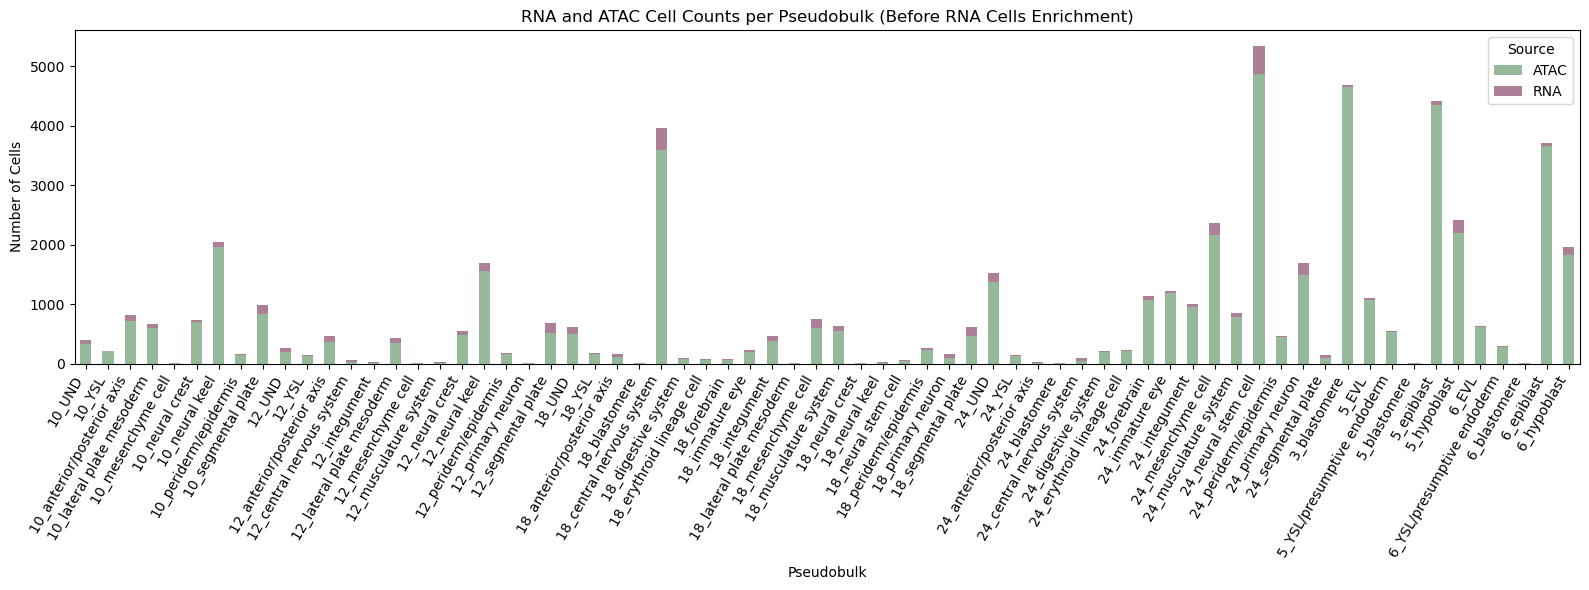

In [113]:
atac_counts = atac_metadata_df.groupby('pseudobulk')['atac_cell'].nunique().reset_index(name='ATAC')
rna_counts = atac_metadata_df.groupby('pseudobulk')['rna_matching_cell'].nunique().reset_index(name='RNA')

stacked_counts = pd.merge(atac_counts, rna_counts, on='pseudobulk', how='outer').fillna(0)
stacked_counts[['ATAC', 'RNA']] = stacked_counts[['ATAC', 'RNA']].astype(int)

stacked_counts.set_index('pseudobulk')[['ATAC', 'RNA']].plot(
    kind='bar',
    stacked=True,
    figsize=(16, 6),
    color=['#96ba99', '#ad8098']
)

plt.xticks(rotation=60, ha='right')
plt.xlabel('Pseudobulk')
plt.ylabel('Number of Cells')
plt.title('RNA and ATAC Cell Counts per Pseudobulk (Before RNA Cells Enrichment)')
plt.legend(title='Source')
plt.tight_layout()
plt.show()



#### Only 2258 RNA cells are assigned to ATAC cells

In [154]:
# continue with log values
matching_cells = atac_metadata_df['rna_matching_cell'].str.strip().unique().tolist()
rna_data_matched = rna_data_log.loc[:, rna_data_log.columns.intersection(matching_cells)]
rna_data_unmatched = rna_data_log.loc[:, ~rna_data_log.columns.isin(matching_cells)]
rna_data_matched

,10h-1_CELL122_N2_10h-1,10h-1_CELL338_N1_10h-1,10h-1_CELL789_N1_10h-1,10h-1_CELL32_N2_10h-1,10h-1_CELL240_N1_10h-1,10h-1_CELL198_N1_10h-1,10h-1_CELL183_N1_10h-1,10h-1_CELL794_N1_10h-1,10h-1_CELL275_N1_10h-1,10h-1_CELL1288_N1_10h-1,...,6h_3 CELL2532_N1 _,6h_3 CELL4334_N1 _,6h_3 CELL3177_N1 _,6h_3 CELL4106_N1 _,6h_3 CELL3320_N1 _,6h_3 CELL2702_N1 _,6h_3 CELL58_N2 _,6h_3 CELL4339_N1 _,6h_3 CELL4337_N1 _,6h_3 CELL4645_N1 _
,,,,,,,,,,,,,,,,,,,,,
rpl13a,7.000000,5.930737,5.285402,5.700440,6.643856,7.066089,6.475733,5.491853,6.614710,4.754888,...,3.169925,2.000000,2.584963,0.000000,2.000000,2.321928,3.321928,2.321928,1.000000,1.584963
khdrbs1a,7.864186,7.417853,6.845490,6.584963,7.707359,8.113742,6.149747,7.179909,6.569856,6.491853,...,6.475733,5.672425,4.247928,4.906891,5.672425,6.475733,6.087463,5.426265,3.169925,5.044394
apoeb,6.442943,8.179909,5.426265,6.459432,5.321928,8.174926,5.700440,6.357552,4.523562,4.700440,...,3.169925,1.584963,6.209453,3.584963,4.523562,5.614710,3.321928,2.807355,5.614710,2.807355
cfl1,5.977280,5.169925,4.247928,4.643856,6.149747,5.930737,4.857981,4.169925,4.754888,3.906891,...,2.584963,1.584963,2.584963,1.000000,3.169925,3.700440,3.000000,3.321928,1.584963,2.321928
polr2d,3.000000,2.000000,2.584963,2.321928,2.000000,4.087463,2.321928,2.321928,1.584963,2.321928,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CU570797.5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
trgv5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
BX950188.3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [171]:
rna_data_unmatched

,10h-1_CELL1140_N1_10h-1,10h-1_CELL1447_N1_10h-1,10h-1_CELL1347_N1_10h-1,10h-1_CELL1204_N1_10h-1,10h-1_CELL97_N2_10h-1,10h-1_CELL539_N1_10h-1,10h-1_CELL310_N1_10h-1,10h-1_CELL311_N1_10h-1,10h-1_CELL665_N1_10h-1,10h-1_CELL350_N1_10h-1,...,6h_3 CELL3882_N1 _,6h_3 CELL5301_N1 _,6h_3 CELL5240_N1 _,6h_3 CELL5143_N1 _,6h_3 CELL5575_N1 _,6h_3 CELL5349_N1 _,6h_3 CELL4434_N1 _,6h_3 CELL5403_N1 _,6h_3 CELL5489_N1 _,6h_3 CELL5447_N1 _
,,,,,,,,,,,,,,,,,,,,,
rpl13a,5.554589,4.523562,4.807355,4.247928,6.209453,6.228819,6.507795,6.599913,5.882643,5.754888,...,2.321928,0.000000,1.584963,2.000000,1.584963,1.584963,2.000000,3.000000,1.000000,1.000000
khdrbs1a,6.357552,5.906891,5.209453,5.930737,7.294621,7.375039,7.531381,7.599913,6.894818,7.228819,...,5.459432,4.906891,4.459432,3.906891,4.584963,4.584963,5.129283,4.584963,4.807355,5.700440
apoeb,6.614710,6.870365,7.599913,4.700440,4.754888,9.144658,6.554589,5.554589,6.569856,7.149747,...,3.584963,3.000000,3.321928,4.087463,4.321928,3.459432,4.321928,2.321928,1.584963,1.000000
cfl1,3.584963,3.321928,3.459432,4.459432,4.954196,5.247928,5.614710,6.044394,4.906891,5.392317,...,3.169925,2.000000,1.584963,1.000000,2.000000,1.584963,3.169925,2.584963,2.000000,2.807355
polr2d,2.584963,1.000000,1.000000,2.807355,2.000000,2.000000,2.584963,2.807355,1.000000,3.000000,...,0.000000,0.000000,0.000000,1.584963,0.000000,0.000000,1.000000,1.000000,1.000000,2.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CU570797.5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
trgv5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
BX950188.3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


##### Define a cutoff for each pseudobulk as the distance between this (mean vector of same psd cells) and the most distant cell of the same celltype (from any time point).
    - To enrich the pseudobulks with unmatched RNA cells we will use this cutoff
    - If a new cell has a distance > cutoff, it is more different than any cell of that type used to define the pseudobulk 

In [155]:
def compute_pseudobulk_cutoffs_df(rna_data_matched, atac_metadata):
    metadata = atac_metadata.set_index('rna_matching_cell').loc[rna_data_matched.columns].reset_index(names='rna_matching_cell')
    
    pseudobulk_means = {
        pb: rna_data_matched[metadata[metadata['pseudobulk'] == pb]['rna_matching_cell']].mean(axis=1)
        for pb in metadata['pseudobulk'].unique()
    }
    
    results = []
    for pb, mean_vec in pseudobulk_means.items():
        celltype = metadata[metadata['pseudobulk'] == pb]['atac_cell_type'].iloc[0]
        same_type_cells = metadata[metadata['atac_cell_type'] == celltype]['rna_matching_cell']
        distances = [euclidean(rna_data_matched[cell], mean_vec.values) for cell in same_type_cells]
        results.append({
            'pseudobulk': pb,
            'atac_cell_type': celltype,
            'cutoff': max(distances),
            'n_cells_in_pseudobulk': (metadata['pseudobulk'] == pb).sum(),
            'n_cells_same_type': (metadata['atac_cell_type'] == celltype).sum()
        })
    
    return pd.DataFrame(results)

cutoffs_df = compute_pseudobulk_cutoffs_df(rna_data_matched, atac_metadata_df)
cutoffs_df


,pseudobulk,atac_cell_type,cutoff,n_cells_in_pseudobulk,n_cells_same_type
0,12_neural keel,neural keel,156.645686,1557,3525
1,18_central nervous system,central nervous system,191.180815,3599,3672
2,10_neural crest,neural crest,129.205270,694,1177
3,12_neural crest,neural crest,128.591818,478,1177
4,12_integument,integument,138.114820,10,1336
...,...,...,...,...,...
63,6_blastomere,blastomere,174.889419,5,4676
64,12_primary neuron,primary neuron,178.142711,1,1598
65,5_blastomere,blastomere,166.291536,2,4676
66,5_EVL,EVL,111.782719,1071,1678


In [176]:
# create rna_data_pseudobulk mean and std dataframes for the log transformed data. 
# Aggregate the RNA data by pseudobulk using the matched cells "og"
cell_to_pseudobulk = atac_metadata_df.set_index('rna_matching_cell')['pseudobulk'].to_dict()
rna_data_psd_names = rna_data_matched.rename(columns=cell_to_pseudobulk)
rna_data_std_pseudobulk_og = rna_data_psd_names.groupby(by=rna_data_psd_names.columns, axis=1).std()
rna_data_mean_pseudobulk_og = rna_data_psd_names.groupby(by=rna_data_psd_names.columns, axis=1).mean()

rna_data_mean_pseudobulk_og


/tmp/ipykernel_3381107/4256116102.py:5: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  rna_data_std_pseudobulk_og = rna_data_psd_names.groupby(by=rna_data_psd_names.columns, axis=1).std()
/tmp/ipykernel_3381107/4256116102.py:6: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  rna_data_mean_pseudobulk_og = rna_data_psd_names.groupby(by=rna_data_psd_names.columns, axis=1).mean()


,10_UND,10_YSL,10_anterior/posterior axis,10_lateral plate mesoderm,10_neural crest,10_neural keel,10_periderm/epidermis,10_segmental plate,12_UND,12_YSL,...,3_blastomere,5_EVL,5_YSL/presumptive endoderm,5_epiblast,5_hypoblast,6_EVL,6_YSL/presumptive endoderm,6_blastomere,6_epiblast,6_hypoblast
,,,,,,,,,,,,,,,,,,,,,
rpl13a,5.084864,2.292481,5.977550,5.505295,5.860131,5.471751,4.346743,5.809875,5.433258,1.584963,...,2.850926,4.662160,1.935785,2.623231,3.276358,4.178352,1.905843,2.953445,4.253723,3.285158
khdrbs1a,4.742312,3.284928,6.498762,6.354888,6.985411,6.233713,2.729716,6.072204,5.686432,3.700440,...,5.354773,7.578096,3.043094,6.082239,6.388591,6.952145,4.021294,5.648458,6.490304,6.263180
apoeb,2.446045,6.575984,4.891290,4.907480,6.666729,4.654771,0.000000,4.813227,3.869535,0.000000,...,2.321131,2.223308,5.098626,4.674749,4.360641,1.392333,5.915131,1.000000,5.619259,4.404523
cfl1,3.911818,2.292481,4.642868,4.655234,4.435093,4.392690,0.000000,4.284868,4.602898,3.000000,...,4.364861,5.546121,2.194988,3.169378,3.684791,4.788534,2.364896,4.204695,4.009630,3.561034
polr2d,1.181378,0.000000,1.874917,1.880436,1.776963,1.805762,0.000000,1.900582,1.602456,0.000000,...,1.321714,1.166667,0.000000,0.628456,1.095659,0.685348,0.250000,1.500000,1.641023,1.037416
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CU570797.5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
trgv5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
BX950188.3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [177]:
rna_data_std_pseudobulk_og

,10_UND,10_YSL,10_anterior/posterior axis,10_lateral plate mesoderm,10_neural crest,10_neural keel,10_periderm/epidermis,10_segmental plate,12_UND,12_YSL,...,3_blastomere,5_EVL,5_YSL/presumptive endoderm,5_epiblast,5_hypoblast,6_EVL,6_YSL/presumptive endoderm,6_blastomere,6_epiblast,6_hypoblast
,,,,,,,,,,,,,,,,,,,,,
rpl13a,1.399266,0.413631,0.691835,0.979182,0.144222,0.878417,0.250059,0.862723,1.354339,NaN,...,1.219588,0.680301,1.679204,0.993310,1.092262,1.210776,0.991226,0.893100,1.355275,1.138125
khdrbs1a,1.208938,1.361887,0.831250,1.111963,0.371969,0.901576,1.031974,0.918636,1.330595,NaN,...,1.099967,0.242179,1.918932,0.906787,0.839930,1.238302,1.338324,0.620846,0.928272,0.895115
apoeb,1.736827,0.518353,1.892713,1.714878,1.156514,1.552761,0.000000,1.724409,2.079896,NaN,...,1.410240,0.975078,0.604008,1.023677,1.506551,1.145386,1.609619,1.414214,1.781348,1.312432
cfl1,1.250308,0.413631,0.725061,1.140185,0.573928,0.855007,0.000000,0.984587,1.068130,NaN,...,1.023061,0.580672,1.303466,0.795998,1.289989,1.132852,1.391626,0.165792,1.102192,1.262371
polr2d,0.933950,0.000000,0.901121,0.959408,1.404155,0.677890,0.000000,1.051465,1.016213,NaN,...,0.993516,0.752773,0.000000,0.757726,0.930309,0.725589,0.462910,0.707107,0.955562,0.930771
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CU570797.5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
trgv5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
BX950188.3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
# compute the euclidean distance of each unmatched cell to the mean of each pseudobulk considering ALL genes
from scipy.spatial.distance import cdist

def assign_cells_to_pseudobulk_all_genes(rna_data_unmatched, rna_data_mean_pseudobulk):
    unmatched_matrix = rna_data_unmatched.T.values 
    pseudobulk_matrix = rna_data_mean_pseudobulk.T.values 
    distance_matrix = cdist(unmatched_matrix, pseudobulk_matrix, metric='euclidean')
    pseudobulk_names = list(rna_data_mean_pseudobulk.columns)
    cell_names = list(rna_data_unmatched.columns)
    closest_indices = np.argmin(distance_matrix, axis=1)
    closest_pseudobulks = [pseudobulk_names[i] for i in closest_indices]
    closest_distances = distance_matrix[np.arange(len(cell_names)), closest_indices]
    cell_to_pseudobulk = dict(zip(cell_names, closest_pseudobulks))
    cell_to_distance = dict(zip(cell_names, closest_distances))

    return cell_to_pseudobulk, cell_to_distance
cell_to_pseudobulk, cell_to_distance = assign_cells_to_pseudobulk_all_genes(rna_data_unmatched, rna_data_mean_pseudobulk_og)
cell_to_pseudobulk

{'10h-1_CELL1140_N1_10h-1': '6_epiblast',
 '10h-1_CELL1447_N1_10h-1': '6_epiblast',
 '10h-1_CELL1347_N1_10h-1': '24_UND',
 '10h-1_CELL1204_N1_10h-1': '12_anterior/posterior axis',
 '10h-1_CELL97_N2_10h-1': '12_neural keel',
 '10h-1_CELL539_N1_10h-1': '12_neural crest',
 '10h-1_CELL310_N1_10h-1': '18_neural keel',
 '10h-1_CELL311_N1_10h-1': '18_neural keel',
 '10h-1_CELL665_N1_10h-1': '10_anterior/posterior axis',
 '10h-1_CELL350_N1_10h-1': '10_neural crest',
 '10h-1_CELL434_N1_10h-1': '10_anterior/posterior axis',
 '10h-1_CELL335_N1_10h-1': '10_anterior/posterior axis',
 '10h-1_CELL1086_N1_10h-1': '12_segmental plate',
 '10h-1_CELL2213_N1_10h-1': '5_YSL/presumptive endoderm',
 '10h-1_CELL646_N1_10h-1': '10_anterior/posterior axis',
 '10h-1_CELL320_N1_10h-1': '12_neural crest',
 '10h-1_CELL149_N2_10h-1': '10_neural crest',
 '10h-1_CELL1088_N1_10h-1': '12_anterior/posterior axis',
 '10h-1_CELL712_N1_10h-1': '12_neural keel',
 '10h-1_CELL1097_N1_10h-1': '18_central nervous system',
 '10h-

Step 1: Assigning cells using all genes...

Step 2: Finding marker genes for each pseudobulk...
Finding markers for 10_UND...
Found 0 marker genes for 10_UND
Finding markers for 10_YSL...
Found 8 marker genes for 10_YSL
Finding markers for 10_anterior/posterior axis...
Found 0 marker genes for 10_anterior/posterior axis
Finding markers for 10_lateral plate mesoderm...
Found 0 marker genes for 10_lateral plate mesoderm
Finding markers for 10_neural crest...
Found 0 marker genes for 10_neural crest
Finding markers for 10_neural keel...
Found 0 marker genes for 10_neural keel
Finding markers for 10_periderm/epidermis...
Found 58 marker genes for 10_periderm/epidermis
Finding markers for 10_segmental plate...
Found 0 marker genes for 10_segmental plate
Finding markers for 12_UND...
Found 0 marker genes for 12_UND
Finding markers for 12_YSL...
Found 0 marker genes for 12_YSL
Finding markers for 12_anterior/posterior axis...
Found 0 marker genes for 12_anterior/posterior axis
Finding markers

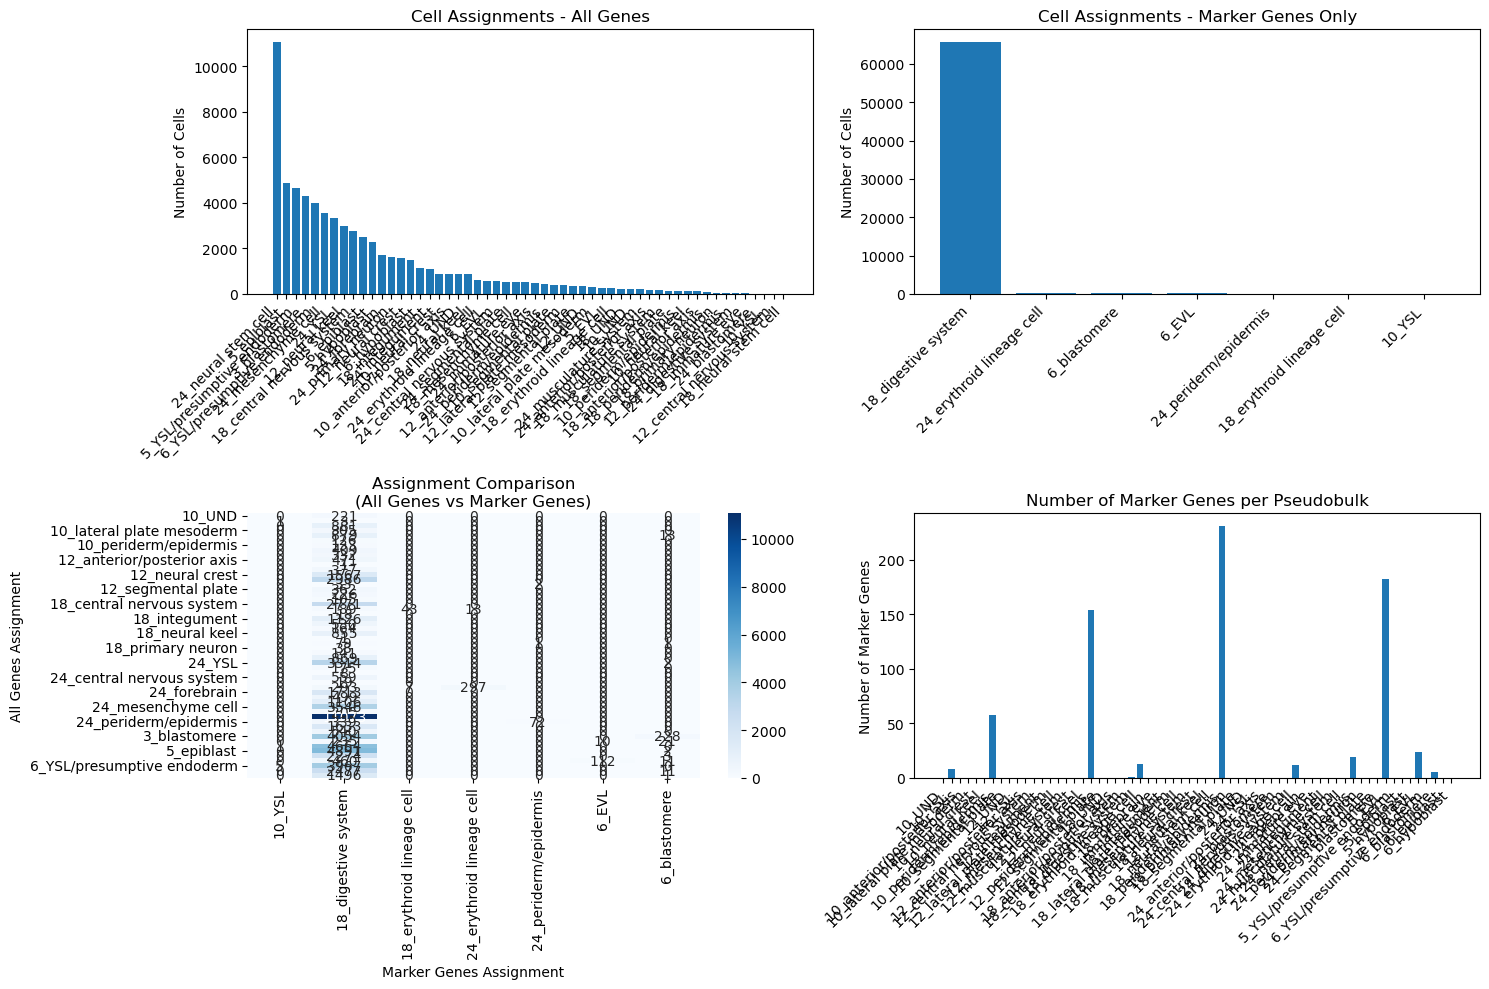


Assignment Agreement: 0.79%
Total cells assigned: 66595

Example marker genes per pseudobulk:
10_UND: []...
10_YSL: ['afp4', 'acp5a', 'npc2', 'zgc:153018', 'ctsll', 'fbp1b', 'anxa1a', 'mttp']...
10_anterior/posterior axis: []...

Saving results...
Analysis complete!
Results stored in:
- cell_to_pseudobulk_all: assignments using all genes
- cell_to_pseudobulk_markers: assignments using marker genes only
- marker_genes_dict: marker genes for each pseudobulk
- df_all_genes: detailed results for all genes method
- df_markers_only: detailed results for marker genes method


In [ ]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import cdist
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.multitest import multipletests

def assign_cells_to_pseudobulk_all_genes(rna_data_unmatched, rna_data_mean_pseudobulk):
    """
    Assign cells to pseudobulks using all genes based on euclidean distance
    """
    unmatched_matrix = rna_data_unmatched.T.values
    pseudobulk_matrix = rna_data_mean_pseudobulk.T.values
    
    # Compute euclidean distance matrix
    distance_matrix = cdist(unmatched_matrix, pseudobulk_matrix, metric='euclidean')
    
    pseudobulk_names = list(rna_data_mean_pseudobulk.columns)
    cell_names = list(rna_data_unmatched.columns)
    
    # Find closest pseudobulk for each cell
    closest_indices = np.argmin(distance_matrix, axis=1)
    closest_pseudobulks = [pseudobulk_names[i] for i in closest_indices]
    closest_distances = distance_matrix[np.arange(len(cell_names)), closest_indices]
    
    # Create assignment dictionaries
    cell_to_pseudobulk = dict(zip(cell_names, closest_pseudobulks))
    cell_to_distance = dict(zip(cell_names, closest_distances))
    
    return cell_to_pseudobulk, cell_to_distance

def find_marker_genes_per_pseudobulk(rna_data_mean_pseudobulk_og, rna_data_std_pseudobulk_og, 
                                   pvalue_threshold=0.05, log_fc_threshold=0.5):
    """
    Find marker genes for each pseudobulk using t-tests
    """
    pseudobulks = rna_data_mean_pseudobulk_og.columns.tolist()
    genes = rna_data_mean_pseudobulk_og.index.tolist()
    
    marker_genes_dict = {}
    
    for pseudobulk in pseudobulks:
        print(f"Finding markers for {pseudobulk}...")
        
        # Get mean and std for current pseudobulk
        current_mean = rna_data_mean_pseudobulk_og[pseudobulk]
        current_std = rna_data_std_pseudobulk_og[pseudobulk]
        
        # Get mean and std for all other pseudobulks
        other_pseudobulks = [p for p in pseudobulks if p != pseudobulk]
        other_means = rna_data_mean_pseudobulk_og[other_pseudobulks].mean(axis=1)
        other_stds = rna_data_std_pseudobulk_og[other_pseudobulks].mean(axis=1)
        
        # Perform t-test for each gene
        t_stats = []
        p_values = []
        log_fold_changes = []
        
        for gene in genes:
            # Calculate log fold change
            if other_means[gene] > 0:
                log_fc = np.log2((current_mean[gene] + 1e-8) / (other_means[gene] + 1e-8))
            else:
                log_fc = np.log2(current_mean[gene] + 1e-8)
            
            # Perform t-test (assuming equal variance)
            if current_std[gene] > 0 and other_stds[gene] > 0:
                # Use Welch's t-test for unequal variances
                t_stat = (current_mean[gene] - other_means[gene]) / np.sqrt(
                    (current_std[gene]**2) + (other_stds[gene]**2)
                )
                # Approximate p-value (simplified)
                p_val = 2 * (1 - stats.norm.cdf(abs(t_stat)))
            else:
                t_stat = 0
                p_val = 1.0
            
            t_stats.append(t_stat)
            p_values.append(p_val)
            log_fold_changes.append(log_fc)
        
        # Multiple testing correction
        _, p_values_corrected, _, _ = multipletests(p_values, method='fdr_bh')
        
        # Select marker genes
        marker_mask = (p_values_corrected < pvalue_threshold) & (np.array(log_fold_changes) > log_fc_threshold)
        marker_genes = [genes[i] for i in range(len(genes)) if marker_mask[i]]
        
        marker_genes_dict[pseudobulk] = marker_genes
        print(f"Found {len(marker_genes)} marker genes for {pseudobulk}")
    
    return marker_genes_dict

def assign_cells_to_pseudobulk_markers_only(rna_data_unmatched, rna_data_mean_pseudobulk_og, 
                                          marker_genes_dict):
    """
    Assign cells to pseudobulks using only marker genes for each pseudobulk
    """
    cell_names = list(rna_data_unmatched.columns)
    pseudobulk_names = list(rna_data_mean_pseudobulk_og.columns)
    
    # For each cell, compute distance to each pseudobulk using only that pseudobulk's markers
    cell_assignments = {}
    cell_distances = {}
    
    for cell in cell_names:
        min_distance = float('inf')
        best_pseudobulk = None
        distances_to_pseudobulks = {}
        
        for pseudobulk in pseudobulk_names:
            marker_genes = marker_genes_dict[pseudobulk]
            
            if len(marker_genes) == 0:
                # If no markers, use very high distance
                distance = float('inf')
            else:
                # Get expression values for marker genes only
                cell_expression = rna_data_unmatched.loc[marker_genes, cell].values
                pseudobulk_expression = rna_data_mean_pseudobulk_og.loc[marker_genes, pseudobulk].values
                
                # Compute euclidean distance
                distance = np.sqrt(np.sum((cell_expression - pseudobulk_expression)**2))
            
            distances_to_pseudobulks[pseudobulk] = distance
            
            if distance < min_distance:
                min_distance = distance
                best_pseudobulk = pseudobulk
        
        cell_assignments[cell] = best_pseudobulk
        cell_distances[cell] = min_distance
    
    return cell_assignments, cell_distances


In [192]:
cell_to_celltype = atac_metadata_df.set_index('rna_matching_cell')['atac_cell_type'].to_dict()
rna_data_celltype_named = rna_data_matched.rename(columns=cell_to_celltype)
rna_data_mean_celltype = rna_data_celltype_named.groupby(by=rna_data_celltype_named.columns, axis=1).mean()
rna_data_std_celltype = rna_data_celltype_named.groupby(by=rna_data_celltype_named.columns, axis=1).std()
rna_data_mean_celltype


/tmp/ipykernel_3381107/3246719885.py:3: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  rna_data_mean_celltype = rna_data_celltype_named.groupby(by=rna_data_celltype_named.columns, axis=1).mean()
/tmp/ipykernel_3381107/3246719885.py:4: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  rna_data_std_celltype = rna_data_celltype_named.groupby(by=rna_data_celltype_named.columns, axis=1).std()


,EVL,UND,YSL,YSL/presumptive endoderm,anterior/posterior axis,blastomere,central nervous system,digestive system,epiblast,erythroid lineage cell,...,integument,lateral plate mesoderm,mesenchyme cell,musculature system,neural crest,neural keel,neural stem cell,periderm/epidermis,primary neuron,segmental plate
,,,,,,,,,,,,,,,,,,,,,
rpl13a,4.285865,5.373029,2.145203,1.914009,5.823040,2.956376,5.530406,5.511907,3.900449,5.977981,...,5.279508,5.424183,5.103153,5.240937,5.668595,5.573832,4.483356,5.162964,3.979280,5.844727
khdrbs1a,7.091245,4.641468,3.531996,3.754512,6.192894,5.289375,5.399760,4.998037,6.401890,3.778627,...,3.804133,6.003210,4.503269,3.378749,6.401051,6.349320,4.407479,3.455519,4.194276,5.671940
apoeb,1.576994,2.243638,2.475344,5.692448,4.387039,2.445933,2.898172,2.825049,5.414615,0.935194,...,5.308447,4.211091,1.651637,0.940635,6.541641,4.812028,0.331009,0.190476,0.321826,4.502991
cfl1,4.956887,4.316922,3.133526,2.318557,4.630494,4.180602,4.154317,4.261396,3.827576,3.566287,...,2.456101,4.508843,4.087893,2.720696,4.159675,4.387188,3.331949,0.504046,3.354804,4.182071
polr2d,0.792308,1.218737,0.325906,0.181818,1.794301,1.273457,1.676043,0.966178,1.421633,0.714283,...,0.982613,1.726063,1.146742,0.871177,1.398156,1.916735,0.839784,0.456427,0.593147,1.601742
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CU570797.5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
trgv5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
BX950188.3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [195]:
rna_data_std_celltype

,EVL,UND,YSL,YSL/presumptive endoderm,anterior/posterior axis,blastomere,central nervous system,digestive system,epiblast,erythroid lineage cell,...,integument,lateral plate mesoderm,mesenchyme cell,musculature system,neural crest,neural keel,neural stem cell,periderm/epidermis,primary neuron,segmental plate
,,,,,,,,,,,,,,,,,,,,,
rpl13a,1.121914,1.293915,1.081346,1.118888,0.769265,1.214380,1.260955,0.849709,1.446233,0.977063,...,0.975353,0.917875,0.973342,1.334345,1.127597,1.203986,1.101967,0.948236,1.221213,0.823131
khdrbs1a,1.123004,1.526927,1.510844,1.482906,0.866239,1.110324,1.574185,0.890441,0.931561,1.311498,...,1.498831,1.072246,1.190555,1.668330,1.134620,1.122535,1.047206,1.095106,1.166416,1.023382
apoeb,1.147146,2.067198,2.670112,1.425495,1.886848,1.826729,2.148247,1.531234,1.685566,1.567329,...,2.110379,1.909125,1.914933,1.362348,2.187234,1.551558,0.738339,0.402374,0.950174,1.976515
cfl1,1.074733,1.464695,1.350151,1.304507,0.787827,1.202377,1.200538,0.695464,1.094478,1.279312,...,1.657054,1.053178,1.128727,1.729659,1.226963,1.023091,1.157113,0.639406,1.397098,0.995807
polr2d,0.745346,1.055721,0.578251,0.404520,0.907220,0.974871,1.234676,0.888493,1.002820,0.930886,...,0.953624,0.945134,0.984195,0.868440,1.081671,1.138182,0.868165,0.553953,0.746353,1.038402
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CU570797.5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
trgv5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
BX950188.3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [199]:
import numpy as np
import pandas as pd
from scipy.stats import norm
from statsmodels.stats.multitest import multipletests

# Step 1: Compute sample size per cell type
cell_to_celltype = atac_metadata_df.set_index('rna_matching_cell')['atac_cell_type'].to_dict()
rna_data_celltype_named = rna_data_matched.rename(columns=cell_to_celltype)

# Ensure consistent naming
celltype_counts = rna_data_celltype_named.columns.value_counts()
rna_data_mean_celltype = rna_data_celltype_named.groupby(by=rna_data_celltype_named.columns, axis=1).mean()
rna_data_std_celltype = rna_data_celltype_named.groupby(by=rna_data_celltype_named.columns, axis=1).std()

# Step 2: T-test using summary stats
def t_test_from_summary(mean_df, std_df, sample_sizes, pvalue_threshold=0.05, log_fc_threshold=0.5):
    genes = mean_df.index
    cell_types = mean_df.columns
    marker_genes = {}

    for target_ct in cell_types:
        print(f"\nTesting for {target_ct}...")

        other_cts = [ct for ct in cell_types if ct != target_ct]

        mu1 = mean_df[target_ct]
        sd1 = std_df[target_ct]
        n1 = sample_sizes[target_ct]

        mu2 = mean_df[other_cts].mean(axis=1)
        sd2 = std_df[other_cts].mean(axis=1)
        n2 = sample_sizes[other_cts].mean()  # approximate

        # Welch's t-test (approximate with normal)
        numerator = mu1 - mu2
        denominator = np.sqrt((sd1 ** 2) / n1 + (sd2 ** 2) / n2)
        t_stats = numerator / denominator

        # Avoid division by zero
        t_stats = t_stats.replace([np.inf, -np.inf], np.nan).fillna(0)

        # Two-tailed p-values
        p_values = 2 * (1 - norm.cdf(np.abs(t_stats)))

        # FDR correction
        _, pvals_corrected, _, _ = multipletests(p_values, method="fdr_bh")

        # Log fold-change
        log_fc = mu1 - mu2

        # Filter significant marker genes
        mask = (pvals_corrected < pvalue_threshold) & (log_fc > log_fc_threshold)
        marker_genes[target_ct] = list(genes[mask])
        print(f"  Found {mask.sum()} marker genes.")

    return marker_genes

# Step 3: Run it
marker_genes_dict = t_test_from_summary(
    mean_df=rna_data_mean_celltype,
    std_df=rna_data_std_celltype,
    sample_sizes=celltype_counts,
    pvalue_threshold=0.05,
    log_fc_threshold=0.5
)


/tmp/ipykernel_3381107/2641134178.py:12: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  rna_data_mean_celltype = rna_data_celltype_named.groupby(by=rna_data_celltype_named.columns, axis=1).mean()
/tmp/ipykernel_3381107/2641134178.py:13: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  rna_data_std_celltype = rna_data_celltype_named.groupby(by=rna_data_celltype_named.columns, axis=1).std()



Testing for EVL...
  Found 2403 marker genes.

Testing for UND...
  Found 421 marker genes.

Testing for YSL...
  Found 83 marker genes.

Testing for YSL/presumptive endoderm...
  Found 83 marker genes.

Testing for anterior/posterior axis...
  Found 1493 marker genes.

Testing for blastomere...
  Found 1526 marker genes.

Testing for central nervous system...
  Found 475 marker genes.

Testing for digestive system...
  Found 167 marker genes.

Testing for epiblast...
  Found 512 marker genes.

Testing for erythroid lineage cell...
  Found 633 marker genes.

Testing for forebrain...
  Found 167 marker genes.

Testing for hypoblast...
  Found 484 marker genes.

Testing for immature eye...
  Found 878 marker genes.

Testing for integument...
  Found 887 marker genes.

Testing for lateral plate mesoderm...
  Found 952 marker genes.

Testing for mesenchyme cell...
  Found 169 marker genes.

Testing for musculature system...
  Found 438 marker genes.

Testing for neural crest...
  Found 14

In [201]:
from scipy.stats import norm
from statsmodels.stats.multitest import multipletests

# Step 1: Compute sample size per pseudobulk
cell_to_pseudobulk = atac_metadata_df.set_index('rna_matching_cell')['pseudobulk'].to_dict()
rna_data_psd_names = rna_data_matched.rename(columns=cell_to_pseudobulk)

# Compute pseudobulk-level stats
rna_data_mean_pseudobulk_og = rna_data_psd_names.groupby(by=rna_data_psd_names.columns, axis=1).mean()
rna_data_std_pseudobulk_og = rna_data_psd_names.groupby(by=rna_data_psd_names.columns, axis=1).std()
pseudobulk_counts = rna_data_psd_names.columns.value_counts()

# Step 2: Define t-test on summary stats function
def t_test_marker_genes_by_pseudobulk(mean_df, std_df, sample_sizes, pvalue_threshold=0.05, log_fc_threshold=0.5):
    genes = mean_df.index
    pseudobulks = mean_df.columns
    marker_genes = {}

    for target_pb in pseudobulks:
        print(f"\nTesting for {target_pb}...")

        other_pbs = [pb for pb in pseudobulks if pb != target_pb]

        mu1 = mean_df[target_pb]
        sd1 = std_df[target_pb]
        n1 = sample_sizes[target_pb]

        mu2 = mean_df[other_pbs].mean(axis=1)
        sd2 = std_df[other_pbs].mean(axis=1)
        n2 = sample_sizes[other_pbs].mean()

        # Welch’s t-test with normal approximation
        numerator = mu1 - mu2
        denominator = np.sqrt((sd1 ** 2) / n1 + (sd2 ** 2) / n2)
        t_stats = numerator / denominator
        t_stats = t_stats.replace([np.inf, -np.inf], np.nan).fillna(0)

        p_values = 2 * (1 - norm.cdf(np.abs(t_stats)))
        _, pvals_corrected, _, _ = multipletests(p_values, method="fdr_bh")

        log_fc = mu1 - mu2
        mask = (pvals_corrected < pvalue_threshold) & (log_fc > log_fc_threshold)
        marker_genes[target_pb] = list(genes[mask])
        print(f"  Found {mask.sum()} marker genes.")

    return marker_genes

# Step 3: Run the function
marker_genes_per_pseudobulk = t_test_marker_genes_by_pseudobulk(
    mean_df=rna_data_mean_pseudobulk_og,
    std_df=rna_data_std_pseudobulk_og,
    sample_sizes=pseudobulk_counts,
    pvalue_threshold=0.05,
    log_fc_threshold=0.5
)


/tmp/ipykernel_3381107/2615666024.py:9: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  rna_data_mean_pseudobulk_og = rna_data_psd_names.groupby(by=rna_data_psd_names.columns, axis=1).mean()
/tmp/ipykernel_3381107/2615666024.py:10: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  rna_data_std_pseudobulk_og = rna_data_psd_names.groupby(by=rna_data_psd_names.columns, axis=1).std()



Testing for 10_UND...
  Found 6 marker genes.

Testing for 10_YSL...
  Found 80 marker genes.

Testing for 10_anterior/posterior axis...
  Found 1089 marker genes.

Testing for 10_lateral plate mesoderm...
  Found 317 marker genes.

Testing for 10_neural crest...
  Found 998 marker genes.

Testing for 10_neural keel...
  Found 283 marker genes.

Testing for 10_periderm/epidermis...
  Found 397 marker genes.

Testing for 10_segmental plate...
  Found 823 marker genes.

Testing for 12_UND...
  Found 170 marker genes.

Testing for 12_YSL...
  Found 0 marker genes.

Testing for 12_anterior/posterior axis...
  Found 742 marker genes.

Testing for 12_central nervous system...
  Found 0 marker genes.

Testing for 12_integument...
  Found 0 marker genes.

Testing for 12_lateral plate mesoderm...
  Found 250 marker genes.

Testing for 12_mesenchyme cell...
  Found 0 marker genes.

Testing for 12_musculature system...
  Found 0 marker genes.

Testing for 12_neural crest...
  Found 337 marker ge